# Project Overview

* This machine learning project aims to correctly predict Telco users who will churn or not based on their demograhpics and telco related activties. 
* This is a binary classification project. 
* Throughout this project we will be comparing results between different classification models (Random Forest, LightGMB, XGboost). 
* Also we will be utilizing over sampling and hyper parameter tunning to improve the score. Lastly we we identify the best model and also the top features in predicting the target variable. 

# Table Content
* 1.0 <a href='#importpackages'> Import Packages</a>
* 2.0 <a href='#importdata'> Import Data</a>
* 3.0 <a href='#DataUnderstanding'> Data Understanding</a>
* 4.0 <a href='#PreFeatureEngineering'> Pre Feature Engineering</a>
* 5.0 <a href='#eda'> EDA</a>
 - 5.1 Categorical Features
 - 5.2 Numerical Features
 - 5.3 Binning 
* 6.0 <a href='#FeatureEngineering'> Feature Engineering </a>
 - 6.1 Label Encoding
 - 6.2 Heatmap Correlation 
 - 6.3 Chi Square Test
* 7.0 <a href='#TrainTestSplit'> Train Test Split</a>
* 8.0 <a href='#BaseModels'> Base Models</a>
 - Random Forest, LightGMB, XGBoost
* 9.0 <a href='#OverSampling'> Over Sampling</a>
* 10.0 <a href='#HyperParameterTunning'> Hypter Parameter Tunning</a>
 - Feature Importance, RandomizeSearch
* 11.0 <a href='#overallscore'> Overall Model Scores</a>
* 12.0 <a href='#Conclusion'> Conclusion</a>

# 1.0 Import Packages
<a id='importpackages'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

import lightgbm as lgbz
from lightgbm import plot_importance
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tqdm.notebook import tqdm
from time import sleep
from datetime import datetime

from sklearn.feature_selection import SelectKBest, chi2



pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# 2.0 Import Data
<a id='importdata'></a>

In [2]:
df = pd.read_csv('../Telco Customer Prediction/Dataset/Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 3.0 Data Understanding
<a id='DataUnderstanding'></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [83]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


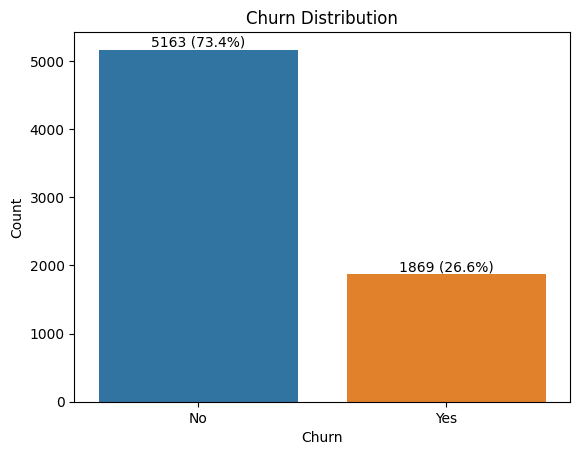

In [7]:
total_count = len(df['Churn'])
counts = df['Churn'].value_counts()
percentages = counts / total_count * 100

# Create the countplot
ax = sns.countplot(data=df, x='Churn')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')

for p, count, percentage in zip(ax.patches, counts, percentages):
    ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


* **Imbalanced dataset** as there are only 26.5% of churned users in this dataset.
* Might need to perform some **over sampling**.

In [8]:
# Investigate all elements within each Feature

for column in df:
    try:
        unique_vals = np.unique(df_raw[column])
    except:
        unique_vals = df[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for {}: {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for {}: {}'.format(column, nr_values))

The number of values for customerID: 7032
The number of values for gender: 2 -- ['Female' 'Male']
The number of values for SeniorCitizen: 2 -- [0 1]
The number of values for Partner: 2 -- ['Yes' 'No']
The number of values for Dependents: 2 -- ['No' 'Yes']
The number of values for tenure: 72
The number of values for PhoneService: 2 -- ['No' 'Yes']
The number of values for MultipleLines: 3 -- ['No phone service' 'No' 'Yes']
The number of values for InternetService: 3 -- ['DSL' 'Fiber optic' 'No']
The number of values for OnlineSecurity: 3 -- ['No' 'Yes' 'No internet service']
The number of values for OnlineBackup: 3 -- ['Yes' 'No' 'No internet service']
The number of values for DeviceProtection: 3 -- ['No' 'Yes' 'No internet service']
The number of values for TechSupport: 3 -- ['No' 'Yes' 'No internet service']
The number of values for StreamingTV: 3 -- ['No' 'Yes' 'No internet service']
The number of values for StreamingMovies: 3 -- ['No' 'Yes' 'No internet service']
The number of value

* Listing out all the unique values for each feature. for features that has more than 10 unique values, the unique count will be shown instead.
* Noticeable for most of the categorical columns, there are same values that are word differently --> "no" and "No internet service"

# 4.0 Pre-Feature Engineering
<a id='PreFeatureEngineering'></a>

In [9]:
df["MultipleLines"] = df["MultipleLines"].replace("No phone service", "No")
df["OnlineSecurity"] = df["OnlineSecurity"].replace("No internet service", "No")
df["OnlineBackup"] = df["OnlineBackup"].replace("No internet service", "No")
df["DeviceProtection"] = df["DeviceProtection"].replace("No internet service", "No")
df["TechSupport"] = df["TechSupport"].replace("No internet service", "No")
df["StreamingTV"] = df["StreamingTV"].replace("No internet service", "No")
df["StreamingMovies"] = df["StreamingMovies"].replace("No internet service", "No")
df["DeviceProtection"] = df["DeviceProtection"].replace("No internet service", "No")

In [10]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) # this will tell you that a row has ' ' For TotalChargers
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# 5.0 EDA
<a id='eda'></a>

## 5.1 Categorical Features

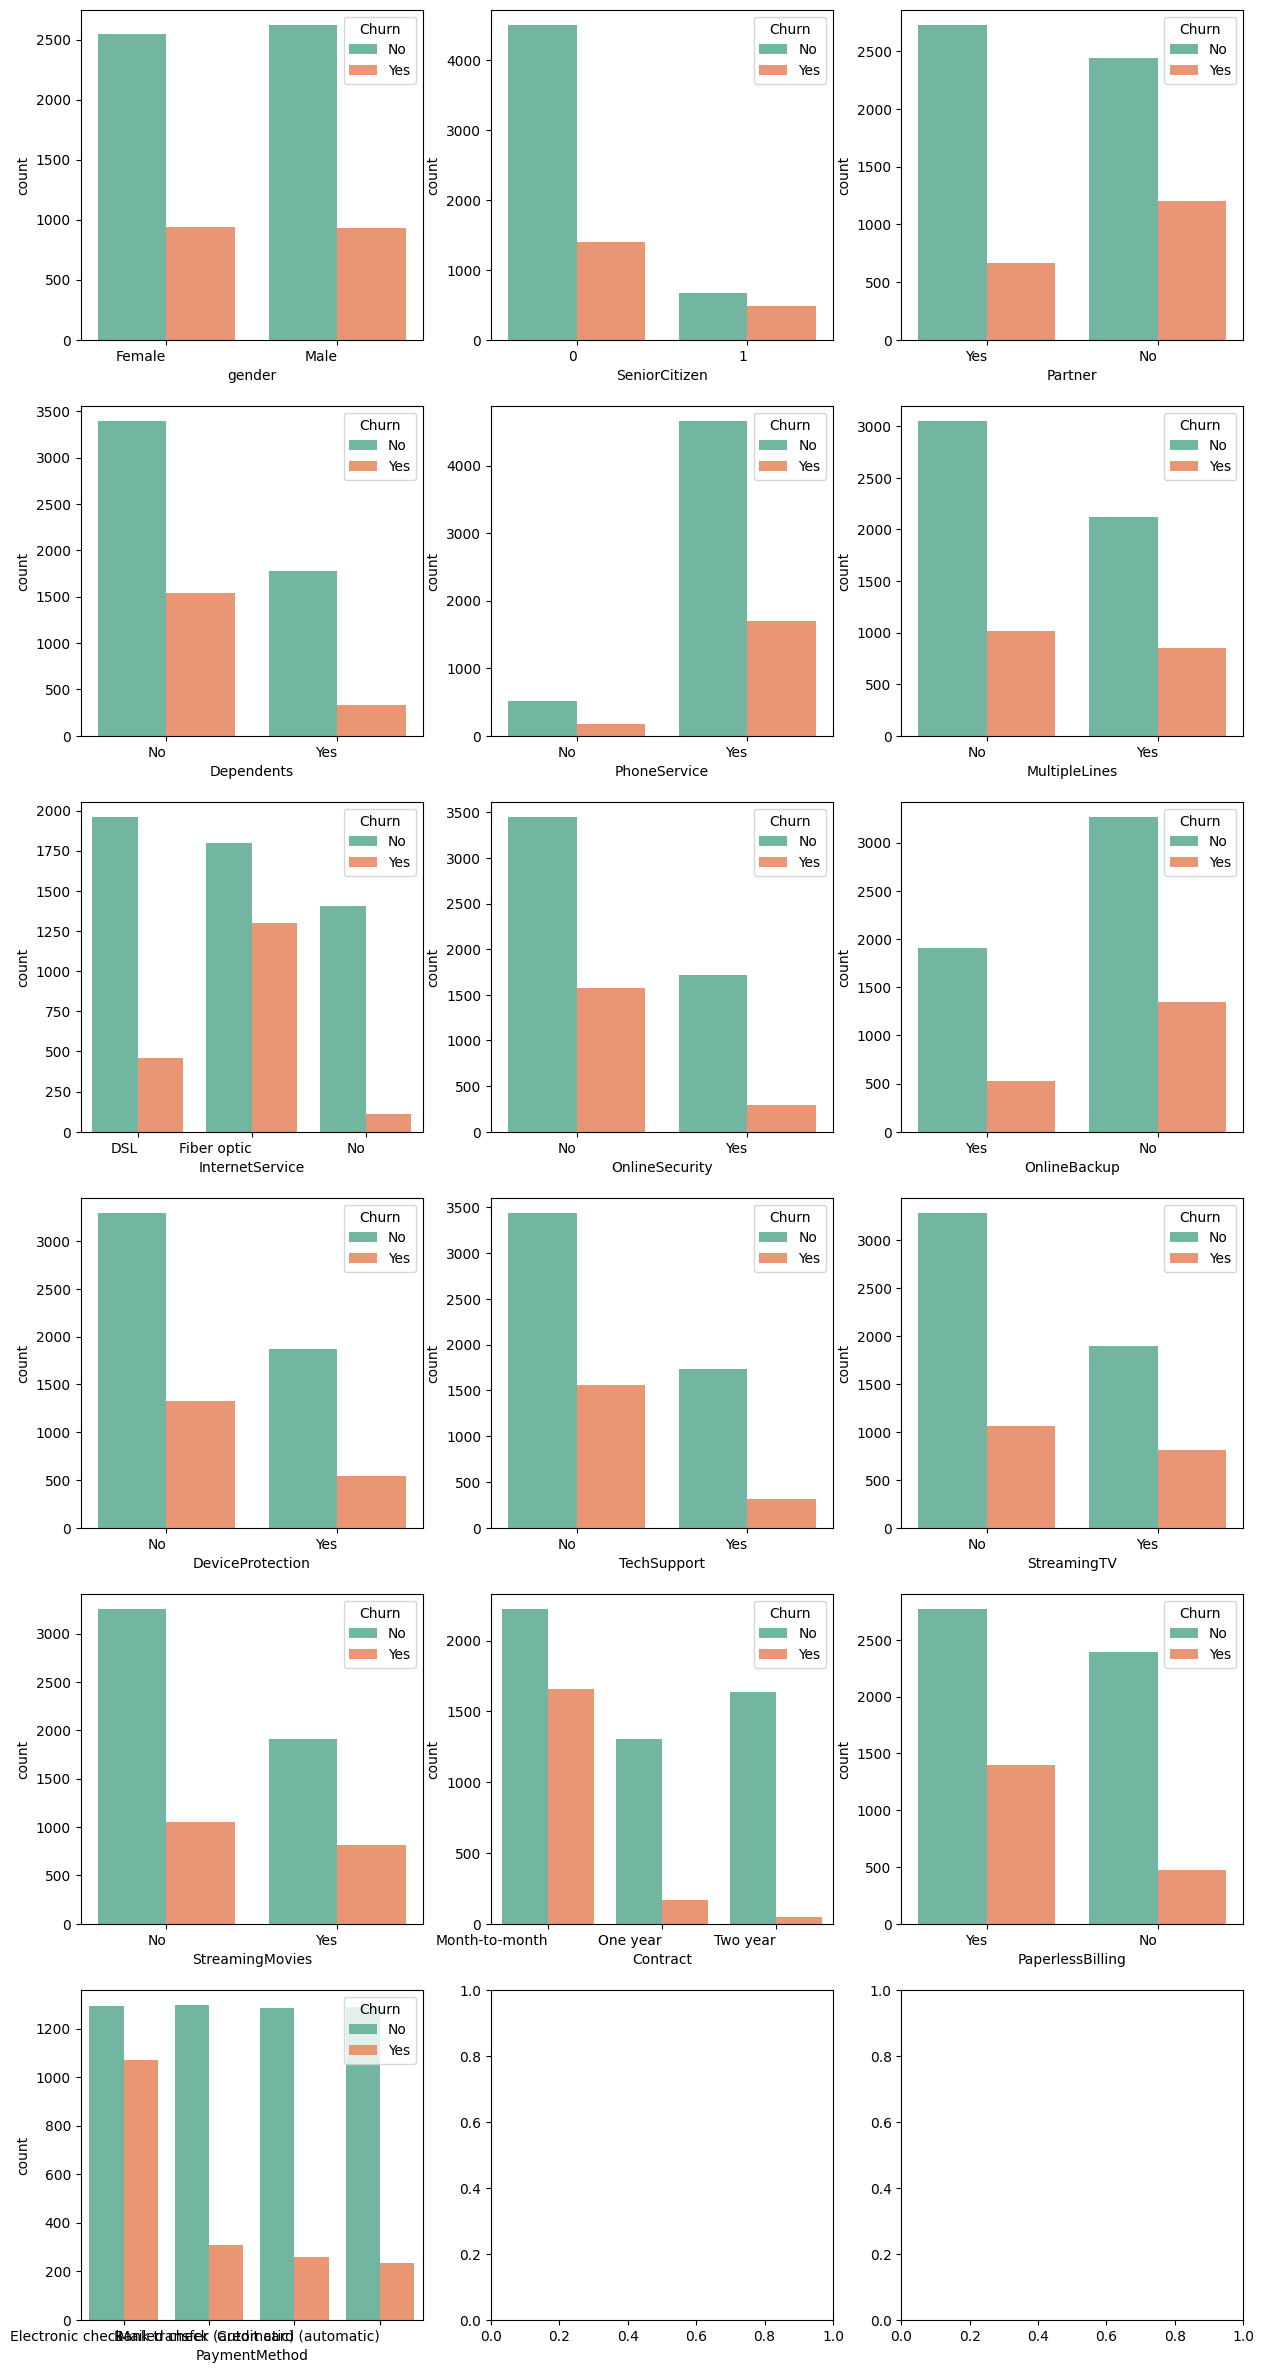

In [11]:
fig,axes=plt.subplots(6,3, figsize=(15, 30))
axes = axes.flatten()

categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

for i in range(len(categories)):
    
    ax= sns.countplot(x=categories[i], data = df, palette = 'Set2', ax=axes[i], hue = 'Churn')
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')


**Noticeable Trends:**
* **Sensior Citizens:** most customers are not Senior Citizens. 
* **InternetService:** higher churn rate for customers using Fiber Optic.
* **OnlineSecurity:** higher churn rate for customers with no OnlineSecurity.
* **Contract:** higher churn rate for customers unnder Month-to-Month Contract.

## 5.2 Numerical Features

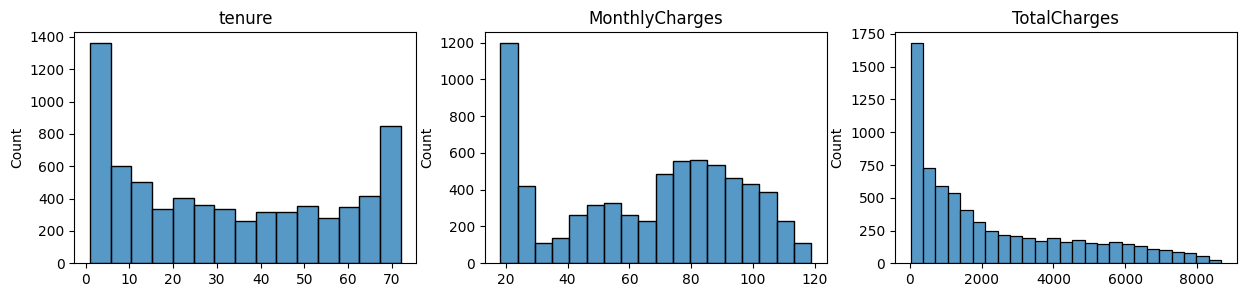

In [12]:
fig,axes=plt.subplots(1,3, figsize=(15, 3))
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

ax = sns.histplot(df['tenure'].values, ax=axes[0]).set_title('tenure')
ax = sns.histplot(df['MonthlyCharges'].values, ax=axes[1]).set_title('MonthlyCharges')
ax = sns.histplot(df['TotalCharges'].values, ax=axes[2]).set_title('TotalCharges')

## 5.3 Binning

In [13]:
bins = [0,5, 10, 15, 20, 25,30,35,40,50, 55, 60, 65, 70, 80]
labels = ['5', '10', '15', '20', '25','30','35','40','50', '55', '60', '65', '70', '80']
df['Tenure_bins'] = pd.cut(df['tenure'], bins=bins, labels=labels)


bins = [18, 28, 38, 48, 58,68,78,88,98]
labels = ['28', '38', '48', '58','68','78','88','98']
df['MonthlyCharges_bins'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)

bins = [-10, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
labels = ['1000', '2000', '3000', '4000', '5000','6000','7000','8000','9000']
df['TotalCharges_bins'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels)

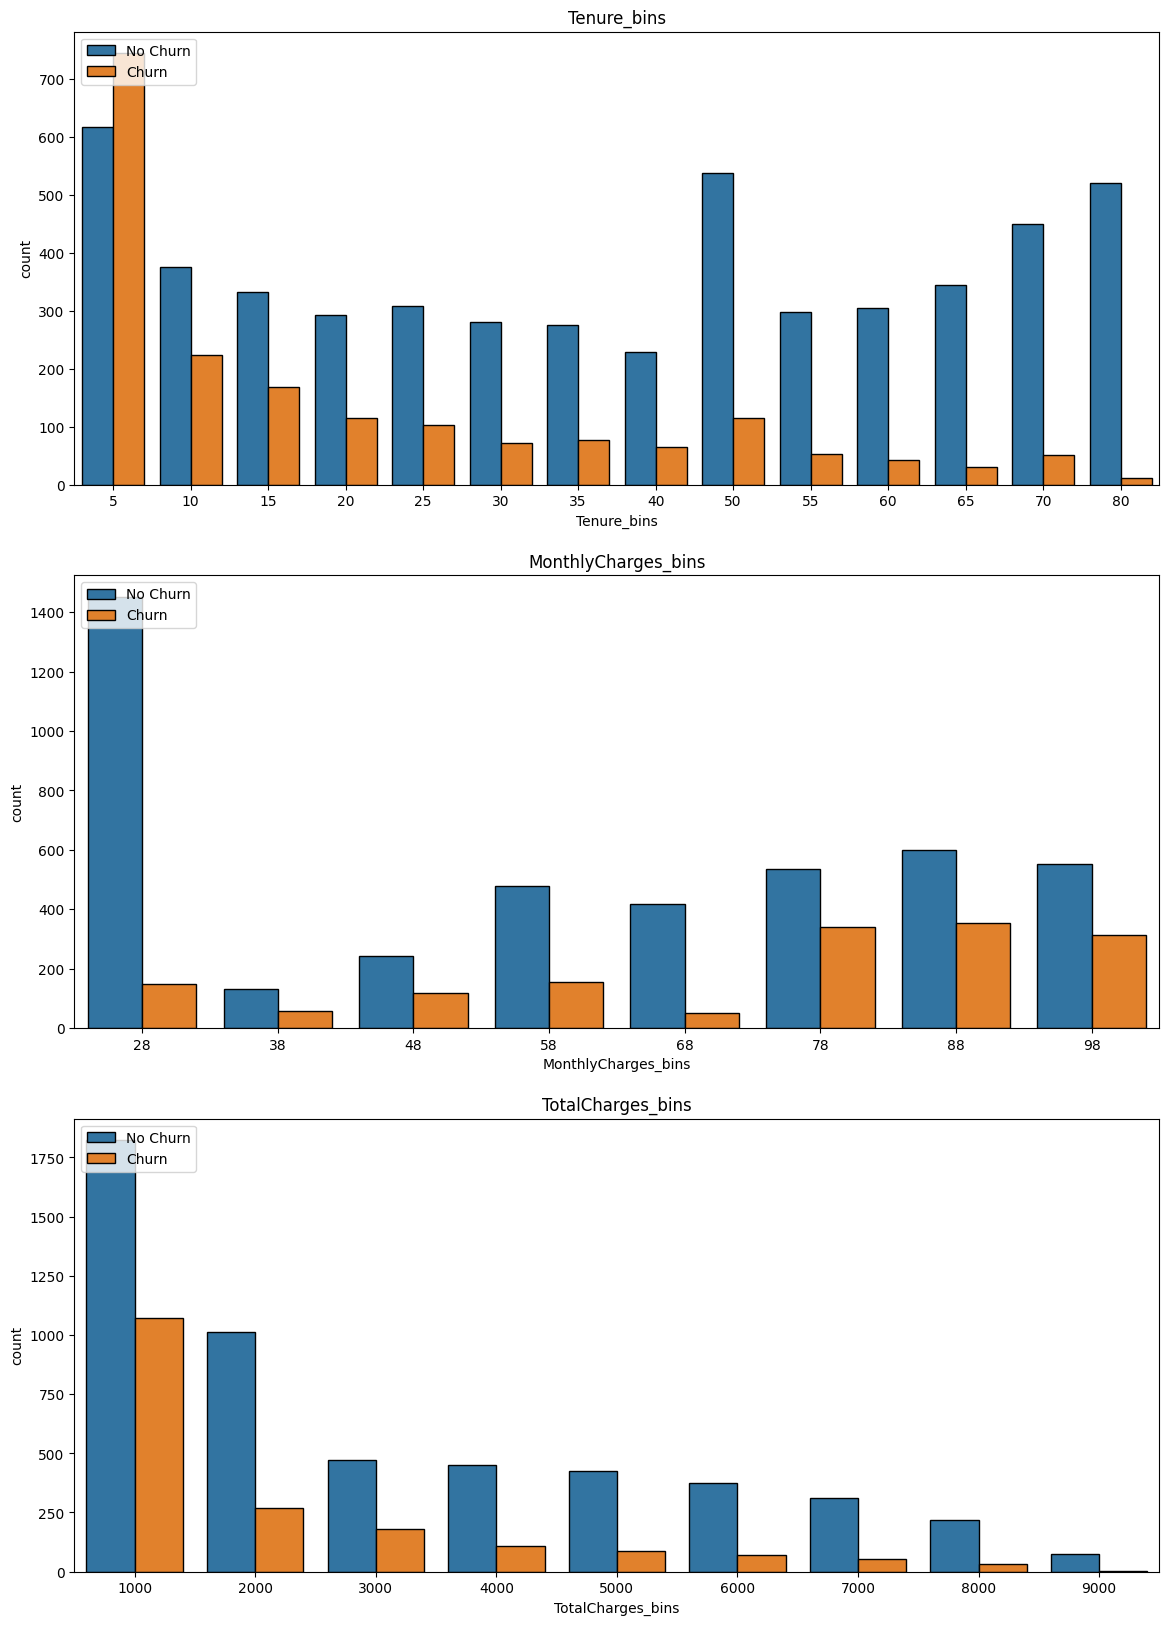

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (14,20))
numeric_feat = ['Tenure_bins', 'MonthlyCharges_bins', 'TotalCharges_bins']

for i in range(3):
    plt.subplot(3,1,i+1)
    sns.countplot(x=numeric_feat[i],data = df ,hue = "Churn",edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numeric_feat[i]
    plt.title(title);

**Noticeable Trend:**
* The shorter the tenure, the more likely the user will churn. **Many churned users only have 5 or lower months of tenure**.
* The higher the charges in total or monthly, the more likely the user will churn. **Noticeable increase proportion of churned users from having to pay $78 and above.**

# 6.0 Feature Engineering
<a id='FeatureEngineering'></a>

## 6.1 Label Encoding

In [15]:
df_final = df.copy()
le = LabelEncoder()

text_data_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']

print('Label Encoder Transformation')
for i in text_data_features :
    df_final[i] = le.fit_transform(df_final[i])
    print(i,' : ',df_final[i].unique(),' = ',le.inverse_transform(df_final[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  [0 1]
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [0 1]  =  ['No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]  =  ['No' 'Yes']
OnlineBackup  :  [1 0]  =  ['Yes' 'No']
DeviceProtection  :  [0 1]  =  ['No' 'Yes']
TechSupport  :  [0 1]  =  ['No' 'Yes']
StreamingTV  :  [0 1]  =  ['No' 'Yes']
StreamingMovies  :  [0 1]  =  ['No' 'Yes']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


## 6.2 Heatmap Correlation

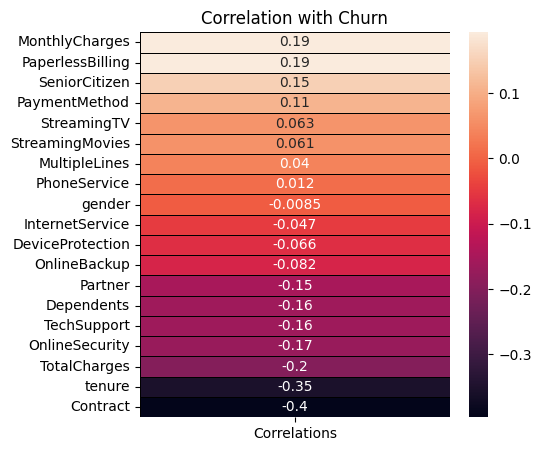

In [16]:
corr = df_final.iloc[:, 1:20].corrwith(df_final['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.show()

* We can see certain features such as **`Contract`**, **`Tenure`**, **`Total Charges`** have stronger correlation with Churn of **0.2 to 0.4**.

## 6.3 Chi Square Test

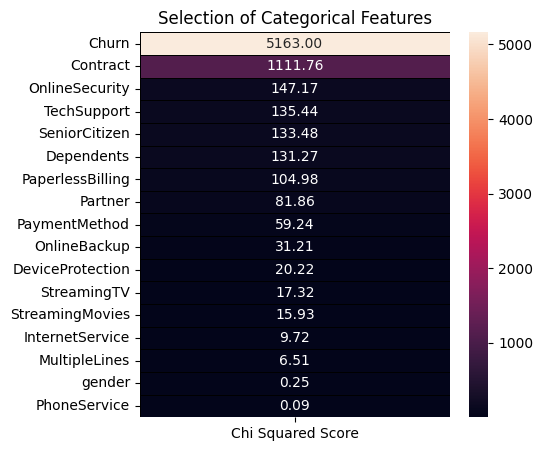

In [17]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']

features = df_final.loc[:,categorical_features]
target = df_final.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

* Using Chi Square Test to see relationship between categorical features to Target Feature (Churn).
* We see that Contract does have signicant impact to Target Feature (Churn).

In [18]:
df_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_bins,MonthlyCharges_bins,TotalCharges_bins
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0,5,38,1000
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,35,58,2000
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1,5,58,1000
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,50,48,2000
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,5,78,1000


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7032 non-null   object  
 1   gender               7032 non-null   int32   
 2   SeniorCitizen        7032 non-null   int64   
 3   Partner              7032 non-null   int32   
 4   Dependents           7032 non-null   int32   
 5   tenure               7032 non-null   int64   
 6   PhoneService         7032 non-null   int32   
 7   MultipleLines        7032 non-null   int32   
 8   InternetService      7032 non-null   int32   
 9   OnlineSecurity       7032 non-null   int32   
 10  OnlineBackup         7032 non-null   int32   
 11  DeviceProtection     7032 non-null   int32   
 12  TechSupport          7032 non-null   int32   
 13  StreamingTV          7032 non-null   int32   
 14  StreamingMovies      7032 non-null   int32   
 15  Contract             

In [20]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_bins,MonthlyCharges_bins,TotalCharges_bins
5705,6108-OQZDQ,Female,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.95,384.50,Yes,5,98,1000
6557,3795-CAWEX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.55,8152.30,No,70,NaN,9000
3801,8625-AZYZY,Male,0,Yes,No,24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.65,2542.45,Yes,25,NaN,3000
6750,2369-FEVNO,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,19.90,19.90,No,5,28,1000
5017,7326-RIGQZ,Male,0,Yes,Yes,6,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,377.85,No,10,78,1000


# 7.0 Train Test Split
<a id='TrainTestSplit'></a>

In [21]:
X = df_final.drop(['Churn','customerID','MonthlyCharges_bins','TotalCharges_bins','Tenure_bins'], axis=1).copy()
y = df_final['Churn'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 8.0 Base Models
<a id='BaseModels'></a>

In [22]:
models = []
acc_lst = []
prec_lst = []
recall_lst = []
f1_lst = []

## 8.1 Random Forest

In [23]:
clf=RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})
clf_fit = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

models.append("Random Forest")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))


print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))
print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7838
Precision: 0.6154
Recall: 0.4541
F1: 0.5226

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1300
           1       0.62      0.45      0.52       458

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



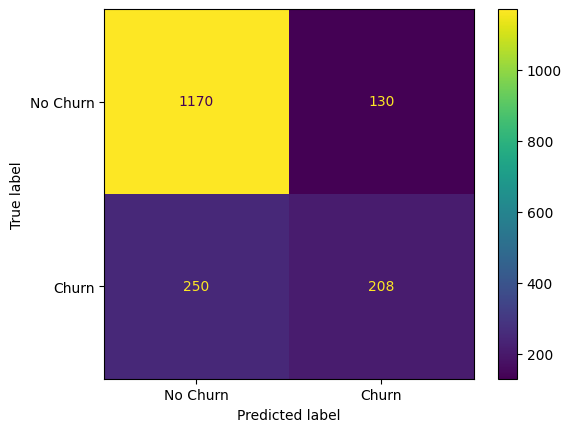

In [24]:
cm = confusion_matrix(y_test, y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.show()

## 8.2 XGBoost

In [25]:
xgb = XGBClassifier()
xgb_fit = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


models.append("XGBoost")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.7685
Precision: 0.5642
Recall: 0.4891
F1: 0.524

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1300
           1       0.56      0.49      0.52       458

    accuracy                           0.77      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.76      0.77      0.76      1758



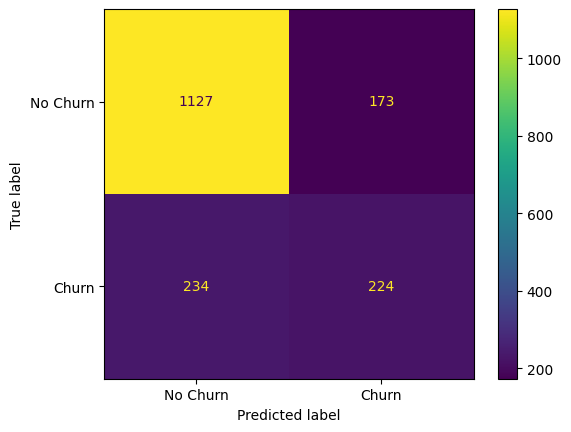

In [26]:
cm = confusion_matrix(y_test, y_pred,labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.show()

## 8.3 Light GBM

In [27]:
lgbs = lgbz.LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3, random_state=42, objective = 'binary')
lgb_fit = lgbs.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=-1,eval_metric='logloss')
y_pred = lgbs.predict(X_test)

models.append("LightGBM")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print('')
print(classification_report(y_test, y_pred))

#print('Training accuracy {:.4f}'.format(lgbs.score(X_train,y_train)))
#print('Testing accuracy {:.4f}'.format(lgbs.score(X_test,y_test)))

Accuracy: 0.7361
Precision: 0.4956
Recall: 0.7402
F1: 0.5937

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1300
           1       0.50      0.74      0.59       458

    accuracy                           0.74      1758
   macro avg       0.69      0.74      0.70      1758
weighted avg       0.79      0.74      0.75      1758



C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


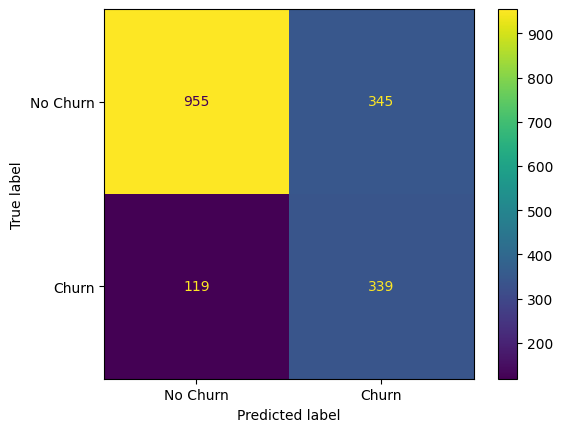

In [28]:
cm = confusion_matrix(y_test, y_pred,labels=lgbs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.show()

## 8.4 Model Results

In [29]:
data = {'models': models,
        'accuracy': acc_lst,
        'precision': prec_lst,
        'recall': recall_lst,
        'f1': f1_lst
        }

df_result_sum = pd.DataFrame(data)

In [30]:
df_result_sum

,models,accuracy,precision,recall,f1
0,Random Forest,0.783845,0.615385,0.454148,0.522613
1,XGBoost,0.768487,0.564232,0.489083,0.523977
2,LightGBM,0.736064,0.495614,0.740175,0.593695


* We can observe that **score is quite bad especially recall scores**.
* This tells us that **model are missing a lot of actual churned users**.
* This is most likely due to the imblaanced dataset of having only 26% of churned user data.

## 8.5 Feature Importance

In [31]:
# clf importance
clf_importance = clf.feature_importances_
clf_names = clf.feature_names_in_

clf_import_df = pd.DataFrame({"feature_names" : clf_names, 
                               "clf_importances" : clf_importance.round(3)})
clf_import_df['clf_impt_rank'] = clf_import_df['clf_importances'].rank(method='dense', ascending=False)

# xgb importance
xgb_importance = xgb.feature_importances_
xgb_names = xgb.feature_names_in_

xgb_import_df = pd.DataFrame({"feature_names" : xgb_names, 
                               "xgb_importances" : xgb_importance.round(3)})
xgb_import_df['xgb_impt_rank'] = xgb_import_df['xgb_importances'].rank(method='dense', ascending=False)

# lgb importance
lgb_importance = lgbs.feature_importances_
boost = lgbs.booster_
lgb_names = boost.feature_name()

lgb_import_df = pd.DataFrame({"feature_names" : lgb_names, 
                               "lgb_importances" : lgb_importance.round(3)})
lgb_import_df['lgb_impt_rank'] = lgb_import_df['lgb_importances'].rank(method='dense', ascending=False)


# combine all importance score
final_import1 = pd.merge(clf_import_df, xgb_import_df, on='feature_names', how='inner')
final_import2 = pd.merge(final_import1, lgb_import_df, on='feature_names', how='inner')
#final_import2[['feature_names', 'clf_impt_rank', 'xgb_impt_rank', 'lgb_impt_rank']]

# compute overall ranking
final_import2['score'] = final_import2['clf_impt_rank'] + final_import2['xgb_impt_rank'] + final_import2['lgb_impt_rank']
final_import2['overall_rank'] = final_import2['score'].rank(method='dense', ascending=True)
final_import2[['feature_names', 'clf_impt_rank', 'xgb_impt_rank', 'lgb_impt_rank','score', 'overall_rank']].sort_values(by = 'overall_rank', ascending=True)
#plot_importance(lgbs, figsize=(10, 9));

,feature_names,clf_impt_rank,xgb_impt_rank,lgb_impt_rank,score,overall_rank
17,MonthlyCharges,1.0,6.0,1.0,8.0,1.0
4,tenure,3.0,3.0,3.0,9.0,2.0
14,Contract,4.0,1.0,6.0,11.0,3.0
18,TotalCharges,2.0,8.0,2.0,12.0,4.0
16,PaymentMethod,5.0,10.0,4.0,19.0,5.0
8,OnlineSecurity,7.0,5.0,8.0,20.0,6.0
7,InternetService,6.0,2.0,13.0,21.0,7.0
15,PaperlessBilling,8.0,8.0,7.0,23.0,8.0
11,TechSupport,10.0,6.0,8.0,24.0,9.0
0,gender,9.0,11.0,5.0,25.0,10.0


* We can see that our **numerical features are the top 3 most impactful** based on feature importance across all 3 models. 
* We can also observed that **XGB model ranking is quite different as compared to LGB and RT Model**. As it ranks TotalCharges and Monthyl charges quite low while they score well in the other models

# 9.0 Over Sampling
<a id='OverSampling'></a>

* As our dataset is imbalanced where only 26% of the dataset are churned users, we can use **Over Sampling Technique to try to solve this**.
* In this case we will use the **simplest oversampling method involves randomly duplicating examples from the minority class in the training dataset**.

In [32]:
churns = len(df_final.loc[df_final['Churn'] == 1])
no_churns = len(df_final.loc[df_final['Churn'] == 0])
churns_perc = round(len(df_final.loc[df_final['Churn'] == 1])/len(df_final)*100,1)
no_churns_perc = round(len(df_final.loc[df_final['Churn'] == 0])/len(df_final)*100,1)

print(df_final.shape)
print('Churns: {} ({}%)'.format(churns, churns_perc))
print('No Churns: {} ({}%)'.format(no_churns, no_churns_perc))
#df.isnull().sum()

(7032, 24)
Churns: 1869 (26.6%)
No Churns: 5163 (73.4%)


In [33]:
# implementing random over sampling
ros = RandomOverSampler(sampling_strategy="not majority") 
x_res, y_res = ros.fit_resample(X,y)

In [34]:
churns = len(y_res[y_res == 1])
no_churns = len(y_res[y_res == 0])
churns_perc = round(len(y_res[y_res == 1])/len(y_res)*100,1)
no_churns_perc = round(len(y_res[y_res == 0])/len(y_res)*100,1)

print(x_res.shape)
print(y_res.shape)
print('Churns: {} ({}%)'.format(churns, churns_perc))
print('No Churns: {} ({}%)'.format(no_churns, no_churns_perc))

(10326, 19)
(10326,)
Churns: 5163 (50.0%)
No Churns: 5163 (50.0%)


* After doing random over sampling, **we can observe that the dataset have become balanced of 50/50.**

## 9.1 Train Test Split Over Sampled Dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, random_state=42)

## 9.2 Random Forest


In [36]:
clf = RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})
clf_fit = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

models.append("Random Forest (OS)")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print(classification_report(y_test, y_pred))


Accuracy: 0.8927
Precision: 0.8542
Recall: 0.9444
F1: 0.8971
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1304
           1       0.85      0.94      0.90      1278

    accuracy                           0.89      2582
   macro avg       0.90      0.89      0.89      2582
weighted avg       0.90      0.89      0.89      2582



## 9.3 XG Boost

In [38]:
xgb = XGBClassifier()
xgb_fit = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


models.append("XGBoost (OS)")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))

print(classification_report(y_test, y_pred))

Accuracy: 0.8466
Precision: 0.8004
Recall: 0.9194
F1: 0.8558
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1304
           1       0.80      0.92      0.86      1278

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



## 9.4 Light GMB

## 9.5 Model Results (Initial Dataset vs Over Sample Dataset)

In [39]:
data = {'models': models,
        'accuracy': acc_lst,
        'precision': prec_lst,
        'recall': recall_lst,
        'f1': f1_lst
        }

df_result_sum = pd.DataFrame(data)
df_result_sum

,models,accuracy,precision,recall,f1
0,Random Forest,0.783845,0.615385,0.454148,0.522613
1,XGBoost,0.768487,0.564232,0.489083,0.523977
2,LightGBM,0.736064,0.495614,0.740175,0.593695
3,Random Forest (OS),0.892719,0.854211,0.944444,0.897064
4,XGBoost (OS),0.846631,0.800409,0.919405,0.855790


## 9.6 Feature Importance

In [40]:
# clf importance
clf_importance = clf.feature_importances_
clf_names = clf.feature_names_in_

clf_import_df = pd.DataFrame({"feature_names" : clf_names, 
                               "clf_importances" : clf_importance.round(3)})
clf_import_df['clf_impt_rank'] = clf_import_df['clf_importances'].rank(method='dense', ascending=False)

# xgb importance
xgb_importance = xgb.feature_importances_
xgb_names = xgb.feature_names_in_

xgb_import_df = pd.DataFrame({"feature_names" : xgb_names, 
                               "xgb_importances" : xgb_importance.round(3)})
xgb_import_df['xgb_impt_rank'] = xgb_import_df['xgb_importances'].rank(method='dense', ascending=False)

# lgb importance
lgb_importance = lgbs.feature_importances_
boost = lgbs.booster_
lgb_names = boost.feature_name()

lgb_import_df = pd.DataFrame({"feature_names" : lgb_names, 
                               "lgb_importances" : lgb_importance.round(3)})
lgb_import_df['lgb_impt_rank'] = lgb_import_df['lgb_importances'].rank(method='dense', ascending=False)


# combine all importance score
final_import1 = pd.merge(clf_import_df, xgb_import_df, on='feature_names', how='inner')
final_import3 = pd.merge(final_import1, lgb_import_df, on='feature_names', how='inner')
#final_import2[['feature_names', 'clf_impt_rank', 'xgb_impt_rank', 'lgb_impt_rank']]

# compute overall ranking
final_import3['score'] = final_import3['clf_impt_rank'] + final_import3['xgb_impt_rank'] + final_import3['lgb_impt_rank']
final_import3['overall_rank'] = final_import3['score'].rank(method='dense', ascending=True)
final_import3[['feature_names', 'clf_impt_rank', 'xgb_impt_rank', 'lgb_impt_rank', 'score', 'overall_rank']].sort_values(by = 'overall_rank', ascending=True)
#plot_importance(lgbs, figsize=(10, 9));

,feature_names,clf_impt_rank,xgb_impt_rank,lgb_impt_rank,score,overall_rank
17,MonthlyCharges,1.0,7.0,1.0,9.0,1.0
14,Contract,4.0,1.0,6.0,11.0,2.0
4,tenure,3.0,5.0,3.0,11.0,2.0
18,TotalCharges,2.0,9.0,2.0,13.0,3.0
16,PaymentMethod,6.0,10.0,4.0,20.0,4.0
7,InternetService,5.0,2.0,13.0,20.0,4.0
15,PaperlessBilling,7.0,8.0,7.0,22.0,5.0
8,OnlineSecurity,9.0,7.0,8.0,24.0,6.0
0,gender,8.0,12.0,5.0,25.0,7.0
11,TechSupport,12.0,7.0,8.0,27.0,8.0


# 10.0 Hyperparameter Tuning
<a id='HyperParameterTunning'></a>

## 10.1 Random Forest

In [41]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=800,num=10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [10,12,15,17,18,20,22] # Max number of levels in tree
min_samples_split = [2,5,7,10,20,30,40,50] # Min number of samples required to split a node
min_samples_leaf = [2,3,4,5,7,10] # Min number of samples requred at each leaft node
bootstrap = [True, False] # Mth of selecting samples for training each tree

rf_param_grid = {
    
    'n_estimators': n_estimators,
    'max_features': max_features, 
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(rf_param_grid)

{'n_estimators': [200, 266, 333, 400, 466, 533, 600, 666, 733, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 15, 17, 18, 20, 22], 'min_samples_split': [2, 5, 7, 10, 20, 30, 40, 50], 'min_samples_leaf': [2, 3, 4, 5, 7, 10], 'bootstrap': [True, False]}


In [42]:
clf=RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})

rf_rand = RandomizedSearchCV(estimator = clf, param_distributions = rf_param_grid, n_iter=80, scoring='roc_auc', cv=3,verbose=2,n_jobs=1)
rf_rand.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=533; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=533; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=533; total time=   2.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=733; total time=   3.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=733; total time=   3.4s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=733; total time=   3.4s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=266; total time=   1.5s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=266; total time=   1.5s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=266; total time=   1.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=50, n_estimators=533; total time=   2.9s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=50, n_estimators=533; total time=   2.9s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=50, n_estimators=533; total time=   2.9s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=666; total time=   3.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=666; total time=   3.6s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=666; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.8s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=   2.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=22, max_

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=733; total time=   3.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=733; total time=   3.4s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=733; total time=   3.3s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=666; total time=   3.2s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=666; total time=   3.3s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=666; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, max_feat

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   3.9s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   3.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   3.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=50, n_estimators=333; total time=   1.6s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=50, n_estimators=333; total time=   1.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=50, n_estimators=333; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=466; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=466; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=466; total time=   2.1s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=50, n_estimators=333; total time=   1.7s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=50, n_estimators=333; total time=   1.7s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=7, min_samples_split=50, n_estimators=333; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, 

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=7, n_estimators=400; total time=   1.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=7, n_estimators=400; total time=   1.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=7, n_estimators=400; total time=   1.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=4, min_samples_split=50, n_estimators=600; total time=   2.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=4, min_samples_split=50, n_estimators=600; total time=   2.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=22, max_features=auto, min_samples_leaf=4, min_samples_split=50, n_estimators=600; total time=   2.5s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=533; total time=   2.4s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=533; total time=   2.4s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=533; total time=   2.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=200; total time=   1.1s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=40, n_estimators=333; total time=   1.4s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=40, n_estimators=333; total time=   1.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=40, n_estimators=333; total time=   1.4s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=800; total time=   4.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=800; total time=   4.6s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=800; total time=   4.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=50, n_estimators=333; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=50, n_estimators=333; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=50, n_estimators=333; total time=   1.8s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=600; total time=   2.8s
[CV] END bootstrap=True, max_depth=20

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=533; total time=   3.2s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=533; total time=   3.2s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=533; total time=   3.2s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=600; total time=   4.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=600; total time=   4.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=600; total time=   3.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=800; total time=   3.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=40, n_estimators=733; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=40, n_estimators=733; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=40, n_estimators=733; total time=   3.3s
[CV] END bootstrap=False, max_depth=17

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=22, max_features=auto, min_samples_leaf=7, min_samples_split=20, n_estimators=800; total time=   4.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=22, max_features=auto, min_samples_leaf=7, min_samples_split=20, n_estimators=800; total time=   4.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=22, max_features=auto, min_samples_leaf=7, min_samples_split=20, n_estimators=800; total time=   4.9s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=40, n_estimators=333; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=40, n_estimators=333; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=40, n_estimators=333; total time=   1.8s
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_dept

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=733; total time=   4.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=733; total time=   4.2s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=733; total time=   4.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=50, n_estimators=466; total time=   2.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=50, n_estimators=466; total time=   2.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=50, n_estimators=466; total time=   2.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.1s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=800; total time=   4.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=800; total time=   4.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=800; total time=   4.6s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   1.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   1.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=333; total time=   1.4s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=333; total time=   1.4s
[CV] END bootstrap=True, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=333; total time=   1.4s
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=7, min_samples_split=40, n_estimators=733; total time=   4.0s
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=7, min_samples_split=40, n_estimators=733; total time=   4.1s
[CV] END bootstrap=False, max_depth=22, max_features=sqrt, min_samples_leaf=7, min_samples_split=40, n_estimators=733; total time=   4.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=266; total time=   1.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=266; total time=   1.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=266; total time=   1.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=333; total time=   2.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=333; total time=   2.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=333; total time=   2.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=800; total time=   4.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=800; total time=   4.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=800; total time=   4.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=600; total time=   3.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=600; total time=   3.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=30, n_estimators=600; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=12, m

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=533; total time=   3.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=533; total time=   2.9s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=533; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=40, n_estimators=400; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=40, n_estimators=400; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=7, min_samples_split=40, n_estimators=400; total time=   2.2s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=30, n_estimators=266; total time=   1.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=30, n_estimators=266; total time=   1.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=30, n_estimators=266; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=30, n_estimators=666; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=30, n_estimators=666; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=30, n_estimators=666; total time=   2.8s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=466; total time=   2.1s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=466; total time=   2.1s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=7, min_samples_split=20, n_estimators=466; total time=   2.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=666; total time=   2.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=666; total time=   2.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=666; total time=   2.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=600; total time=   3.2s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=600; total time=   3.1s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=600; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, m

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=733; total time=   3.6s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=733; total time=   3.6s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=733; total time=   3.6s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=666; total time=   3.9s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=666; total time=   3.9s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=666; total time=   3.9s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=533; total time=   3.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=533; total time=   3.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=533; total time=   3.3s
[CV] END bootstrap=True, max_depth=1

C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=733; total time=   3.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=733; total time=   3.3s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=733; total time=   3.8s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=200; total time=   1.1s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=200; total time=   1.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=200; total time=   1.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=20, n_estimators=733; total time=   4.4s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=20, n_estimators=733; total time=   4.5s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=7, min_samples_split=20, n_estimators=733; total time=   5.7s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   4.0s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   4.1s


C:\Users\Aris Pitias\anaconda3\envs\My_general_env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   4.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=266; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=266; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=266; total time=   1.8s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=400; total time=   1.9s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=400; total time=   1.8s
[CV] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=400; total time=   1.9s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 3}),
                   n_iter=80, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 15, 17, 18, 20,
                                                      22],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 7, 10],
                                        'min_samples_split': [2, 5, 7, 10, 20,
                                                              30, 40, 50],
                                        'n_estimators': [200, 266, 333, 400,
                                                         466, 533, 600, 666,
                                                         733, 800]},
                   scoring='roc_auc', verbose=2)

In [43]:
# showing best parameters
rf_rand.best_params_

{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [44]:
rf_best_param = rf_rand.best_estimator_
y_pred = rf_best_param.predict(X_test)

models.append("Random Forest (HT)")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))
print(classification_report(y_test, y_pred))

Accuracy: 0.8606
Precision: 0.7981
Recall: 0.9617
F1: 0.8722
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1304
           1       0.80      0.96      0.87      1278

    accuracy                           0.86      2582
   macro avg       0.88      0.86      0.86      2582
weighted avg       0.88      0.86      0.86      2582



## 10.2 XG Boost

In [46]:

xgb_param_grid = {
    
    'n_estimators': [int(x) for x in np.linspace(start=200,stop=800,num=10)],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15], 
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7] 
}

In [47]:
xgb = XGBClassifier()
xgb_rand = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_param_grid,n_iter=80,scoring='roc_auc', cv=3,verbose=2,n_jobs=1)
xgb_rand.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3, n_estimators=400; total time=   0.8s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3, n_estimators=400; total time=   0.8s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=3, n_estimators=400; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=600; total time=   2.2s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=600; total time=   2.4s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=600; total time=   2.3s
[CV] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=1, n_estimators=400; total time=   0.9s
[CV] EN

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=400; total time=   0.6s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=400; total time=   0.6s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=400; total time=   0.7s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7, n_estimators=666; total time=   0.9s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7, n_estimators=666; total time=   0.9s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=7, n_estimators=666; total time=   0.9s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=4, mi

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=466; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5, n_estimators=533; total time=   2.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5, n_estimators=533; total time=   2.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5, n_estimators=533; total time=   1.9s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=1, n_estimators=266; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=1, n_estimators=266; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=1, n_estimators=266; total time=   0.4s
[CV] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, 

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=266; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=733; total time=   1.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=733; total time=   0.9s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=733; total time=   1.0s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=533; total time=   1.2s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=533; total time=   1.3s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=533; total time=   1.1s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_c

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=80, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [200, 266, 333, 400,
                                                         466, 533, 600, 666,
                                                         733, 800]},
                   scoring='roc_auc', verbose=2)

In [49]:
#xgb_rand.best_estimator_
xgb_rand.best_params_

{'n_estimators': 466,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [50]:
xgb_best_param = xgb_rand.best_estimator_
y_pred = xgb_best_param.predict(X_test)

models.append("XGBoost (HT)")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))
print(classification_report(y_test, y_pred))

Accuracy: 0.8823
Precision: 0.8363
Recall: 0.9476
F1: 0.8885
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1304
           1       0.84      0.95      0.89      1278

    accuracy                           0.88      2582
   macro avg       0.89      0.88      0.88      2582
weighted avg       0.89      0.88      0.88      2582



## 10.3 LightGBM

In [52]:
lgbm_param_grid = {
    
    'n_estimators': [int(x) for x in np.linspace(start=200,stop=800,num=10)],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15], 
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7] 
}

In [53]:
lgbm = lgbz.LGBMClassifier()
lgbm_rand = RandomizedSearchCV(estimator = lgbm, param_distributions = lgbm_param_grid, n_iter=80, scoring='roc_auc', cv=3,verbose=2,n_jobs=1)
lgbm_rand.fit(X_train,y_train)


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=200; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=200; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=200; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=466; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=466; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[C

[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=466; total time=   0.4s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=466; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=600; total time=   0.6s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=600; total time=   0.6s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=7, n_estimators=600; total time=   0.6s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=266

[CV] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=600; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=666; total time=   0.5s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=666; total time=   0.7s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=666; total time=   0.8s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=800; total time=   0.5s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=800;

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=666; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=666; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=400; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=400; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=400; total time=   0.1s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=3, n_estimators=600; t

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=333; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=333; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=3, n_estimators=333; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=733; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=733; total time=   0.2s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=733; tot

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=5, n_estimators=800; total time=   0.8s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1, n_estimators=800; total time=   0.5s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1, n_estimators=800; total time=   0.5s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1, n_estimators=800; total time=   0.5s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=333; total time=   0.3s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=3

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=80, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [200, 266, 333, 400,
                                                         466, 533, 600, 666,
                                                         733, 800]},
                   scoring='roc_auc', verbose=2)

In [54]:
lgbm_rand.best_params_

{'n_estimators': 666,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [55]:
xgb_best_param = lgbm_rand.best_estimator_
y_pred = lgbm_rand.predict(X_test)

models.append("LightGBM (HT)")
acc_lst.append(accuracy_score(y_test, y_pred))
prec_lst.append(precision_score(y_test, y_pred))
recall_lst.append(recall_score(y_test, y_pred))
f1_lst.append(f1_score(y_test, y_pred))

print("Accuracy:", float(format(accuracy_score(y_test, y_pred), '.4f')))
print("Precision:", float(format(precision_score(y_test, y_pred), '.4f')))
print("Recall:", float(format(recall_score(y_test, y_pred), '.4f')))
print("F1:", float(format(f1_score(y_test, y_pred), '.4f')))
print(classification_report(y_test, y_pred))

Accuracy: 0.8784
Precision: 0.8301
Recall: 0.9484
F1: 0.8853
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1304
           1       0.83      0.95      0.89      1278

    accuracy                           0.88      2582
   macro avg       0.89      0.88      0.88      2582
weighted avg       0.89      0.88      0.88      2582



# 11.0 Overall Model Scores
<a id='overallscore'></a>

In [56]:
data = {'models': models,
        'accuracy': acc_lst,
        'precision': prec_lst,
        'recall': recall_lst,
        'f1': f1_lst
        }

df_result_sum = pd.DataFrame(data)
df_result_sum

,models,accuracy,precision,recall,f1
0,Random Forest,0.783845,0.615385,0.454148,0.522613
1,XGBoost,0.768487,0.564232,0.489083,0.523977
2,LightGBM,0.736064,0.495614,0.740175,0.593695
3,Random Forest (OS),0.892719,0.854211,0.944444,0.897064
4,XGBoost (OS),0.846631,0.800409,0.919405,0.855790
5,Random Forest (HT),0.860573,0.798052,0.961659,0.872250
6,XGBoost (HT),0.882262,0.836326,0.947574,0.888481
7,LightGBM (HT),0.878389,0.830137,0.948357,0.885318


# 12.0 Conclusion 
<a id='Conclusion'></a>
* We can observed that our models, **espically recall score improved a lot after doing oversampling**. This is likely due to the increased data of churn users which allow us to better predict churned users. 
* **Hypertuned models only did slightly better**. This might be due to the user of Randomize Hyper tunning. Hence, not a very comprehensive search if we are limited to line. 
* Top predictive features are **Tenure, Monthly Charges, Total Charges, Payment Method and Contract Type**. This is based on the feature importance score across the 3 models used.
* Random Forest and LightGBM have very similar ranking of feature importance while XGBoost rankings differ quite abit.
* More can be done to improve the score, feature elimations, standardization, more comprehensive tunning etc. 
